<a href="https://colab.research.google.com/github/giftycad/ATM-PROJECT/blob/main/Assignment1_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [8]:
img = cv2.imread('sample_data/cat3.jpg',cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not read the image file 'cat3.jpg'.")
    print("Please ensure the file exists and is a valid image.")
else:
    # Resize the image
    img = cv2.resize(img, (400, 300))
    print("Image loaded and resized successfully.")


#img = cv2.resize(img,(400,300))

Image loaded and resized successfully.


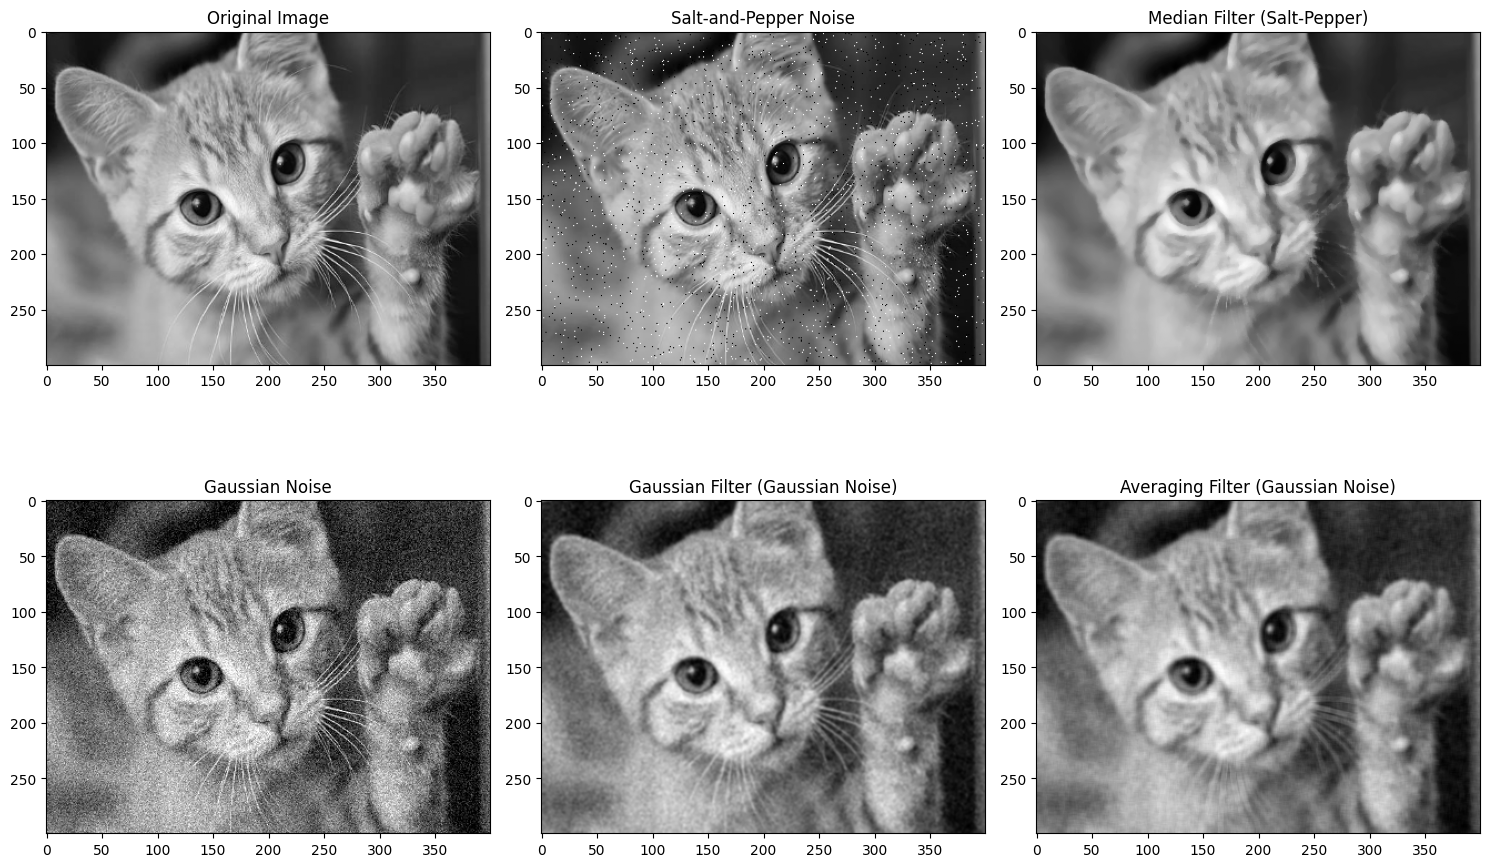

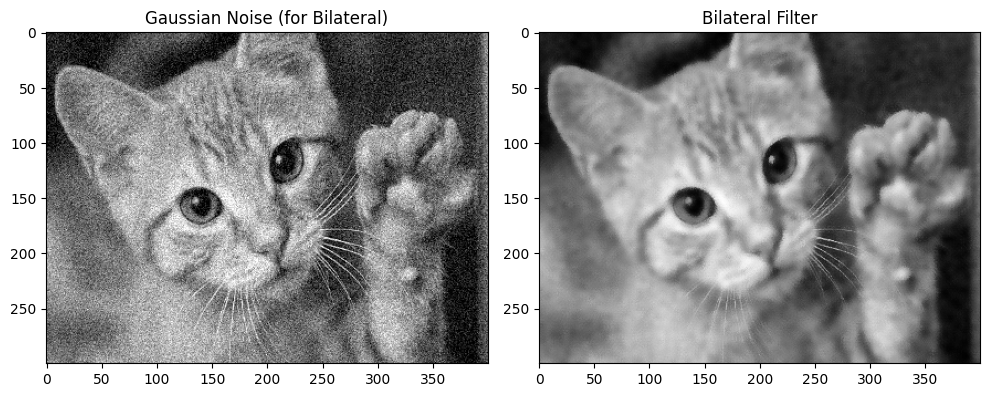

In [12]:
img_float = img.astype(np.float32) / 255.0 # Normalize to [0, 1]

#Add saltnpepper & gaussian noise

def add_salt_pepper_noise(image, salt_vs_pepper, amount):
        """Adds Salt-and-Pepper noise to an image."""
        noisy_image = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * salt_vs_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        noisy_image[tuple(coords)] = 1  # White pixels (salt)

        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1 - salt_vs_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
        noisy_image[tuple(coords)] = 0  # Black pixels (pepper)
        return noisy_image

def add_gaussian_noise(image, mean=0, var=0.01):
        """Adds Gaussian noise to an image."""
        sigma = var**0.5
        gaussian = np.random.normal(mean, sigma, image.shape)
        noisy_image = image + gaussian
        return np.clip(noisy_image, 0, 1) # Clip to [0, 1] range

noisy_salt_pepper = add_salt_pepper_noise(img_float, salt_vs_pepper=0.5, amount=0.02)
noisy_salt_pepper_display = (noisy_salt_pepper * 255).astype(np.uint8)


noisy_gaussian = add_gaussian_noise(img_float, mean=0, var=0.01)
noisy_gaussian_display = (noisy_gaussian * 255).astype(np.uint8)

#Apply Filters to Remove Noise

#for saltnpepper noisy image
median_filtered_sp = cv2.medianBlur(noisy_salt_pepper_display, 5)

#for gaussian noisy image
gaussian_filtered_gauss = cv2.GaussianBlur(noisy_gaussian_display, (5, 5), 0)

average_filtered = cv2.blur(noisy_gaussian_display, (5, 5))

bilateral_filtered = cv2.bilateralFilter(noisy_gaussian_display, 9, 75, 75)

plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(noisy_salt_pepper_display, cmap='gray'), plt.title('Salt-and-Pepper Noise')
plt.subplot(2, 3, 3), plt.imshow(median_filtered_sp, cmap='gray'), plt.title('Median Filter (Salt-Pepper)')

plt.subplot(2, 3, 4), plt.imshow(noisy_gaussian_display, cmap='gray'), plt.title('Gaussian Noise')
plt.subplot(2, 3, 5), plt.imshow(gaussian_filtered_gauss, cmap='gray'), plt.title('Gaussian Filter (Gaussian Noise)')
plt.subplot(2, 3, 6), plt.imshow(average_filtered, cmap='gray'), plt.title('Averaging Filter (Gaussian Noise)')


plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(noisy_gaussian_display, cmap='gray'), plt.title('Gaussian Noise (for Bilateral)')
plt.subplot(1, 2, 2), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('Bilateral Filter')
plt.tight_layout()
plt.show()



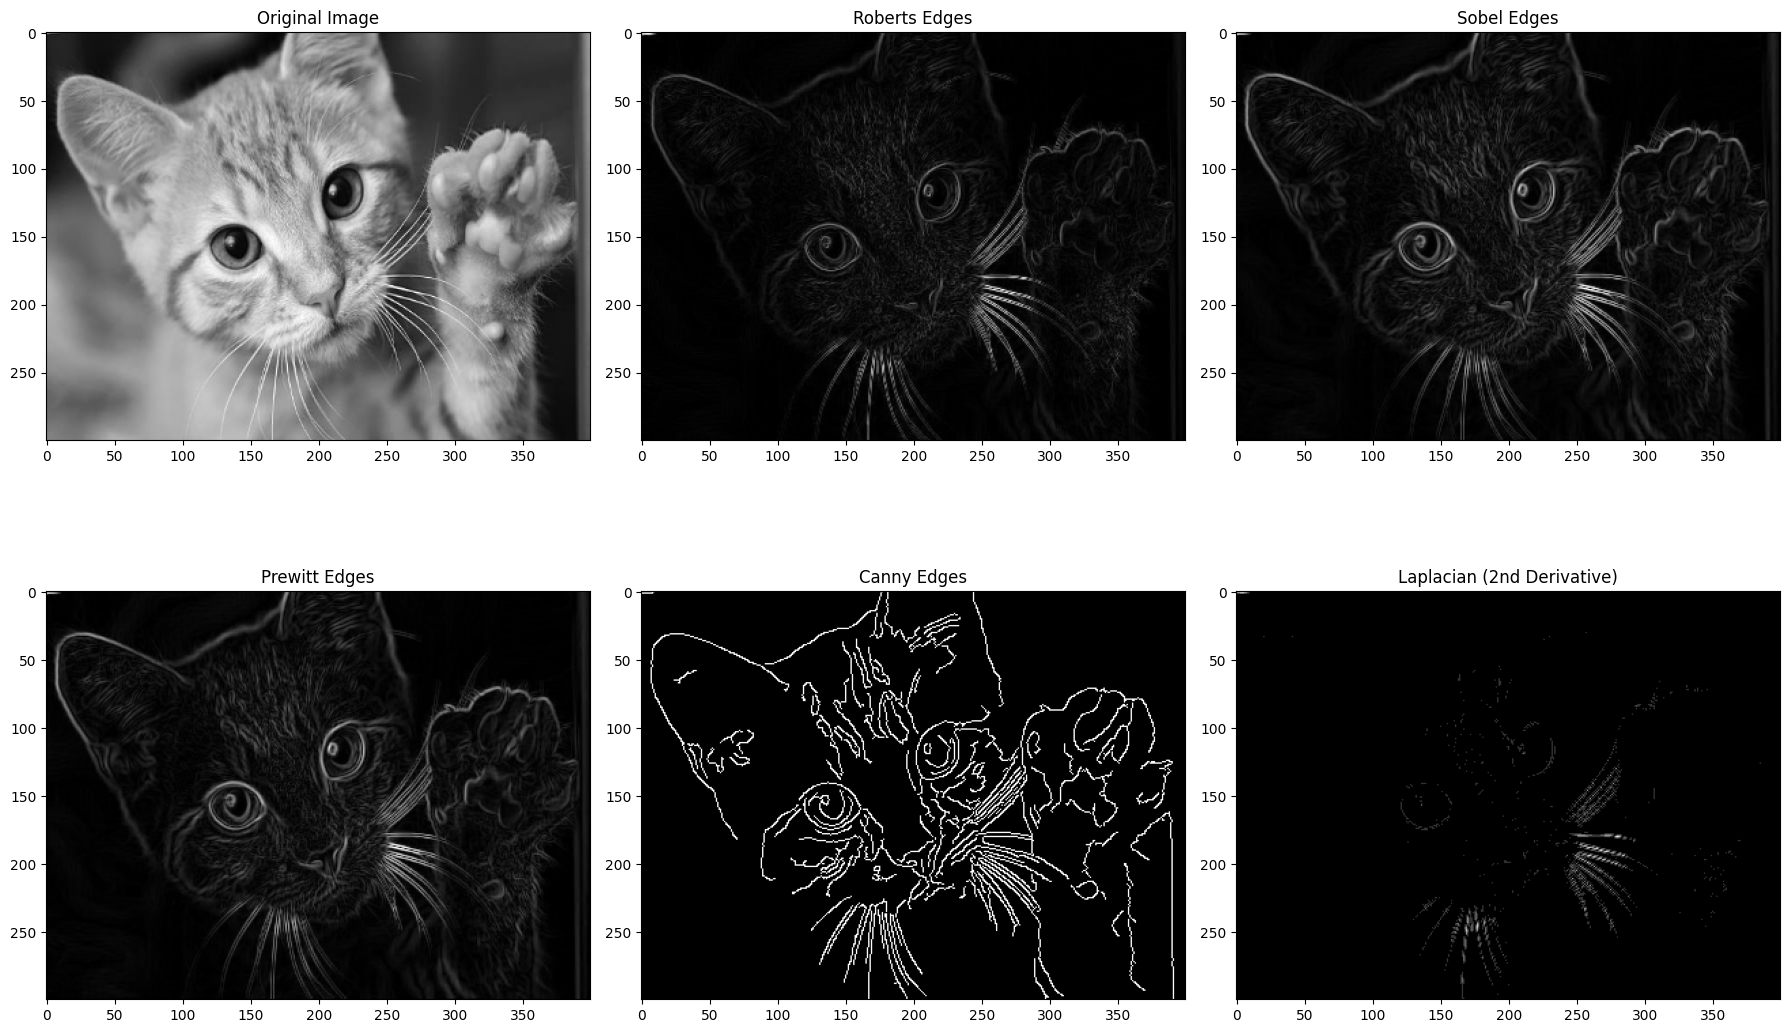

In [14]:
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

roberts_grad_x = cv2.filter2D(img_float, -1, roberts_x)
roberts_grad_y = cv2.filter2D(img_float, -1, roberts_y)

roberts_edges = np.sqrt(roberts_grad_x**2 + roberts_grad_y**2)
roberts_edges = cv2.normalize(roberts_edges, None, 0, 255, cv2.NORM_MINMAX) # Normalize to 0-255
roberts_edges = np.uint8(roberts_edges)

sobel_grad_x = cv2.Sobel(img_float, cv2.CV_64F, 1, 0, ksize=3) # CV_64F to avoid overflow
sobel_grad_y = cv2.Sobel(img_float, cv2.CV_64F, 0, 1, ksize=3)

sobel_edges = np.sqrt(sobel_grad_x**2 + sobel_grad_y**2)
sobel_edges = cv2.normalize(sobel_edges, None, 0, 255, cv2.NORM_MINMAX)
sobel_edges = np.uint8(sobel_edges)

prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

prewitt_grad_x = cv2.filter2D(img_float, -1, prewitt_x)
prewitt_grad_y = cv2.filter2D(img_float, -1, prewitt_y)

prewitt_edges = np.sqrt(prewitt_grad_x**2 + prewitt_grad_y**2)
prewitt_edges = cv2.normalize(prewitt_edges, None, 0, 255, cv2.NORM_MINMAX)
prewitt_edges = np.uint8(prewitt_edges)

blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
canny_edges = cv2.Canny(blurred_img, 50, 150)

laplacian = cv2.Laplacian(img_float, cv2.CV_32F, ksize=3)

laplacian_edges = np.uint8(np.absolute(laplacian))
laplacian_edges = cv2.normalize(laplacian_edges, None, 0, 255, cv2.NORM_MINMAX)
laplacian_edges = np.uint8(laplacian_edges)

plt.figure(figsize=(18, 12)) # Adjusted figure size for more images

plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(roberts_edges, cmap='gray'), plt.title('Roberts Edges')
plt.subplot(2, 3, 3), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Edges')
plt.subplot(2, 3, 4), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Edges')
plt.subplot(2, 3, 5), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(2, 3, 6), plt.imshow(laplacian_edges, cmap='gray'), plt.title('Laplacian (2nd Derivative)')

plt.tight_layout()
plt.show()
